#Fuzzy

In [ ]:
# !pip install sklearn
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=49e90e4a4ecce66cce5ef0ce9f554aec9f9e43cf6b082d5b604ddd606fea2c8c
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Generate some example data
np.random.seed(0) # Sets the seed for NumPy's random number generator to ensure reproducibility.
data = np.random.rand(100, 2) # Generates a 2D array of random numbers with 100 rows and 2 columns, representing example data points.

In [ ]:
data

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       [0.43758721, 0.891773  ],
       [0.96366276, 0.38344152],
       [0.79172504, 0.52889492],
       [0.56804456, 0.92559664],
       [0.07103606, 0.0871293 ],
       [0.0202184 , 0.83261985],
       [0.77815675, 0.87001215],
       [0.97861834, 0.79915856],
       [0.46147936, 0.78052918],
       [0.11827443, 0.63992102],
       [0.14335329, 0.94466892],
       [0.52184832, 0.41466194],
       [0.26455561, 0.77423369],
       [0.45615033, 0.56843395],
       [0.0187898 , 0.6176355 ],
       [0.61209572, 0.616934  ],
       [0.94374808, 0.6818203 ],
       [0.3595079 , 0.43703195],
       [0.6976312 , 0.06022547],
       [0.66676672, 0.67063787],
       [0.21038256, 0.1289263 ],
       [0.31542835, 0.36371077],
       [0.57019677, 0.43860151],
       [0.98837384, 0.10204481],
       [0.20887676, 0.16130952],
       [0.65310833, 0.2532916 ],
       [0.46631077, 0.24442559],
       [0.

In [ ]:
# Define the number of clusters
n_clusters = 3

In [ ]:
# Apply fuzzy c-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data.T, n_clusters, 2, error=0.005, maxiter=1000, init=None
)

In [ ]:
# Predict cluster membership for each data point
cluster_membership = np.argmax(u, axis=0)

In [ ]:
# Print the cluster centers
print('Cluster Centers:', cntr)

# Print the cluster membership for each data point
print('Cluster Membership:', cluster_membership)

# DBSCAN

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets


In [ ]:
# Load data in X
X, y_true = make_blobs(n_samples=200, centers=3,
					cluster_std=0.50, random_state=2)


['y', 'b', 'g', 'r']


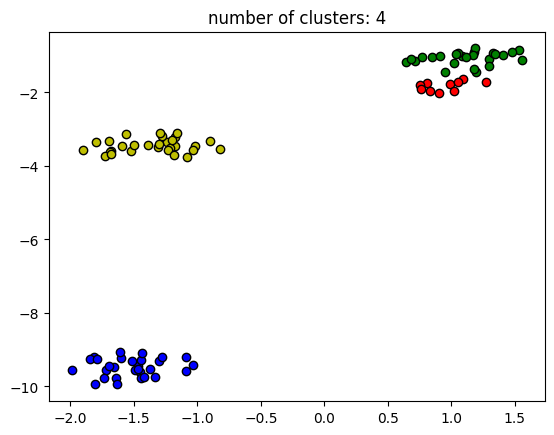

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()
